Matt Cornell

## M.Cornell "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

C:\Users\matth\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


read the data

In [2]:
df=pd.read_excel("data/train_test_dataset.xlsx")
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


identify data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


combine data columns results into one column

In [4]:
# Total amount of games per year
df['YTGT'] = df['Y1G1'] + df['Y1G2'] + df['Y1G3'] + df['Y1G4'] + df['Y1G5']
df.head(1)

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL,YTGT
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203,3


In [5]:
df = df.drop('Y1G1', axis=1)
df = df.drop('Y1G2', axis=1)
df = df.drop('Y1G3', axis=1)
df = df.drop('Y1G4', axis=1)
df = df.drop('Y1G5', axis=1)
df = df.drop('CHILD', axis=1)
df = df.drop('GNDR', axis=1)
df = df.drop('OWNHOME', axis=1)
df = df.drop('SPORT', axis=1)
df = df.drop('COMP', axis=1)
df.head(3)

,FAKEID,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,PCTMARR,HOMEVAL,YTGT
0,580V74KT,0,15,8,1,94,4,77,203,3
1,298S54OK,1,15,3,1,,,53,68,2
2,268D25AO,1,15,11,1,67,2,50,38,2


Convert data types and check data types

In [6]:
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')
df['INCOME'] = pd.to_numeric(df['INCOME'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 10 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         7223 non-null float64
INCOME      7272 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
YTGT        9216 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 720.1+ KB


fill null values 

In [7]:
df=df.fillna({'AGE':'0'})
df=df.fillna({'INCOME': '0'})
df.isnull().sum()

FAKEID      0
Y2defect    0
Y1price     0
YEARS       0
BACKER      0
AGE         0
INCOME      0
PCTMARR     0
HOMEVAL     0
YTGT        0
dtype: int64

check data type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 10 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
YTGT        9216 non-null int64
dtypes: int64(7), object(3)
memory usage: 720.1+ KB


## Data Visualization

Create pivot table

In [9]:
df.groupby(['YTGT']).count()

,FAKEID,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,PCTMARR,HOMEVAL
YTGT,,,,,,,,,
1,2555,2555,2555,2555,2555,2555,2555,2555,2555
2,3221,3221,3221,3221,3221,3221,3221,3221,3221
3,2185,2185,2185,2185,2185,2185,2185,2185,2185
4,1039,1039,1039,1039,1039,1039,1039,1039,1039
5,216,216,216,216,216,216,216,216,216


create histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010693080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011791E80>]], dtype=object)

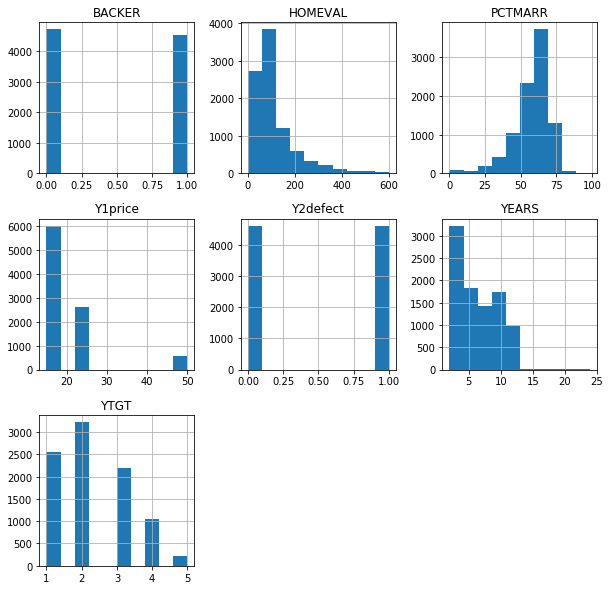

In [10]:
df.hist(figsize=(10,10))

create a histogram for Y value (or column) only

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011830B38>]], dtype=object)

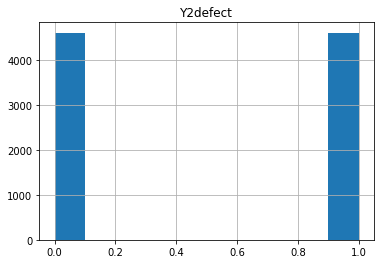

In [11]:
df.hist('Y2defect')

Check relationship between two variables

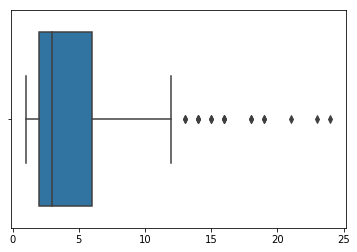

In [12]:
sns.boxplot([df.YTGT, df.YEARS])

Create scatter plot

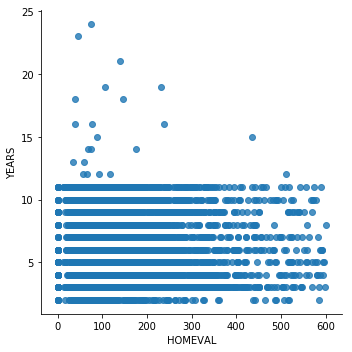

In [13]:
sns.lmplot('HOMEVAL', 'YEARS', data=df, fit_reg=False)

Seaborn Relationship

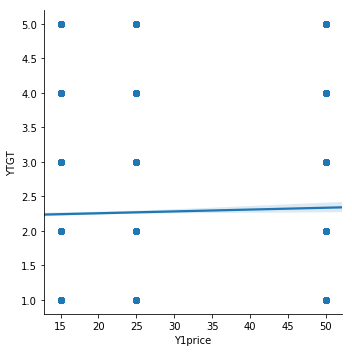

In [14]:
sns.lmplot("Y1price", "YTGT", df)

## Data Analysis

Create hypothesis 1

My null hypothesis is that there is no significant difference for the amount of games a person goes to affects if people chooses to renew a season ticket for the next year.

test hypothesis 1

In [15]:
hp1a = df[df['Y2defect'] == 1]['YTGT']
hp1b = df[df['Y2defect'] == 0]['YTGT']
hp1r = stats.ttest_ind(hp1a, hp1b)
print "The t-statistic is %.3f and the p-value is %.3f." % hp1r

The t-statistic is -16.030 and the p-value is 0.000.


Based on the result of the hypothesis testing, I would reject the null hypothesis

Create hypothesis 2

My null hypothesis is that there is no significant differnce for the price of games for a person affects if people chooses to renew a season ticket for the next year.

test hypothesis 2

In [16]:
hp2a = df[df['Y2defect'] == 1]['Y1price']
hp2b = df[df['Y2defect'] == 0]['Y1price']
hp2r = stats.ttest_ind(hp2a, hp2b)
print "The t-statistic is %.3f and the p-value is %.3f." % hp2r

The t-statistic is -2.256 and the p-value is 0.024.


based on the result of the hypothesis testing, i would reject the null hypothesis

Correlation of the data

In [17]:
df.corr()

,Y2defect,Y1price,YEARS,BACKER,PCTMARR,HOMEVAL,YTGT
Y2defect,1.000000,-0.023498,-0.139099,-0.189929,-0.023869,0.029722,-0.164720
Y1price,-0.023498,1.000000,0.043768,-0.090287,0.008032,0.095580,0.022259
YEARS,-0.139099,0.043768,1.000000,0.533836,0.023691,-0.049689,0.217106
BACKER,-0.189929,-0.090287,0.533836,1.000000,0.032558,-0.064727,0.220321
PCTMARR,-0.023869,0.008032,0.023691,0.032558,1.000000,0.046570,0.021239
HOMEVAL,0.029722,0.095580,-0.049689,-0.064727,0.046570,1.000000,-0.011751
YTGT,-0.164720,0.022259,0.217106,0.220321,0.021239,-0.011751,1.000000


heatmap for correlation

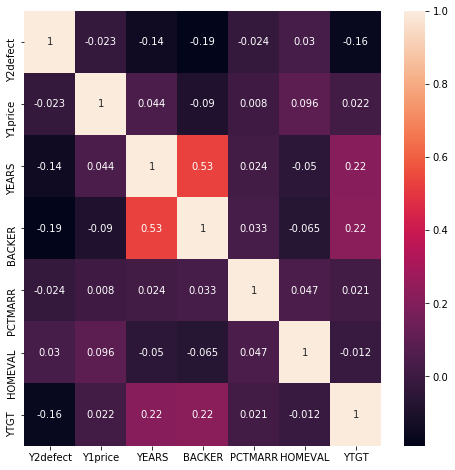

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

cluster map 

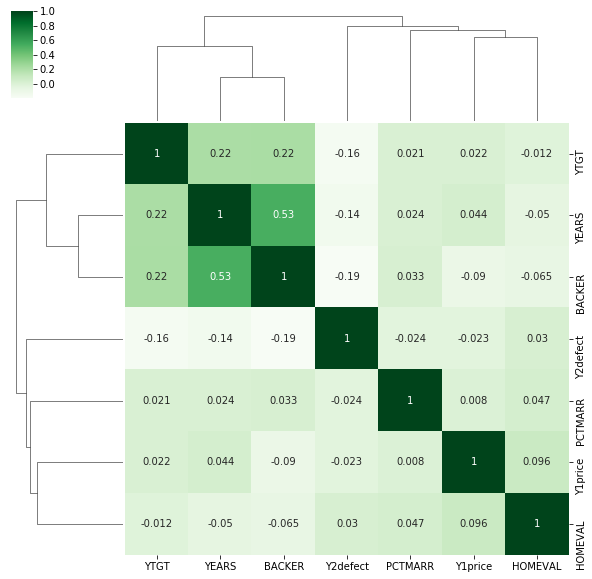

In [19]:
sns.clustermap(data=df.corr(), annot=True, cmap='Greens')

Describe the data

In [20]:
df.describe()

,Y2defect,Y1price,YEARS,BACKER,PCTMARR,HOMEVAL,YTGT
count,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000
mean,0.500000,19.963108,6.378038,0.489475,58.228516,112.111220,2.255642
std,0.500027,8.820188,2.873927,0.499916,12.902173,92.292223,1.054032
min,0.000000,15.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,15.000000,4.000000,0.000000,52.000000,56.000000,1.000000
50%,0.500000,15.000000,6.000000,0.000000,61.000000,81.000000,2.000000
75%,1.000000,25.000000,9.000000,1.000000,67.000000,132.000000,3.000000
max,1.000000,50.000000,24.000000,1.000000,99.000000,600.000000,5.000000


Analyze which columns factor towards a renewal for the next year

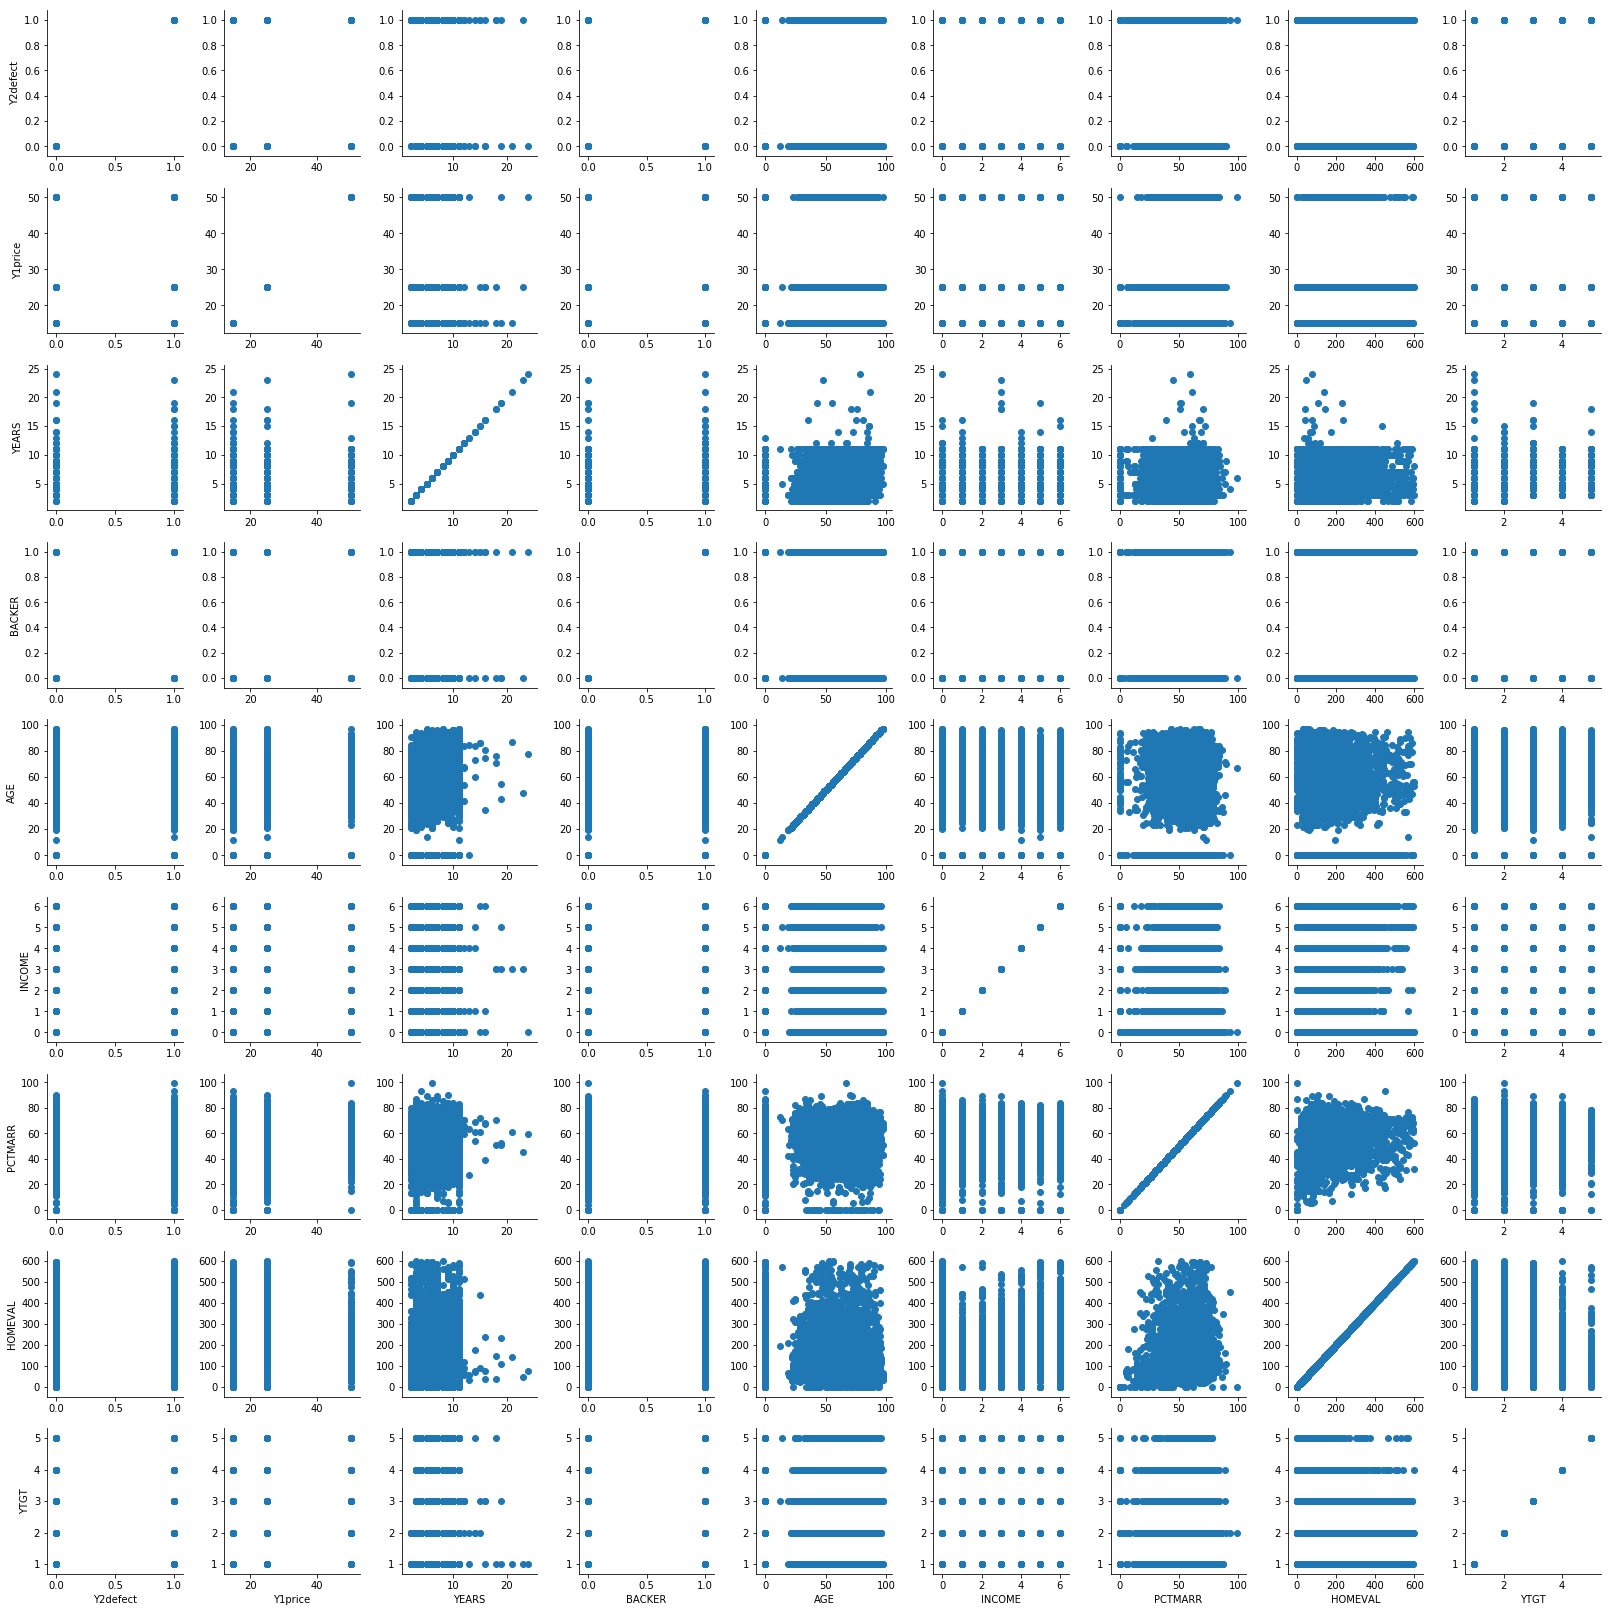

In [21]:
g = sns.PairGrid(df)
g.map(plt.scatter)

# Model Development

identify variables needed for decision tree model

In [22]:
y = df['Y2defect']
X = df[['Y1price', 'YEARS','HOMEVAL', 'YTGT', 'AGE', 'INCOME']]

decision tree

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.535807291667
--------------------------------------------------------
[[1235 1047]
 [1092 1234]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.53      0.54      0.54      2282
          1       0.54      0.53      0.54      2326

avg / total       0.54      0.54      0.54      4608

--------------------------------------------------------
0.535858221243


my decision tree model accuracy is 53.58% and the AUC score is 53.59%

random forest perameters

In [25]:
df = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
df=df.fit(X, y)
df.score(X,y)

0.99012586805555558

In [26]:
# generate evaluation metrics
print metrics.accuracy_score(y, df.predict(X))
print metrics.confusion_matrix(y, df.predict(X))
print metrics.classification_report(y, df.predict(X)) 
print metrics.roc_auc_score(y_test, df.predict(X_test))

0.990125868056
[[4567   41]
 [  50 4558]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      4608
          1       0.99      0.99      0.99      4608

avg / total       0.99      0.99      0.99      9216

0.990041319293


Random forest model accuracy is 99.01% and the AUC score is 99%

multiclass classification

In [27]:
from sklearn import svm
X = [[0], [1], [2], [3], [4], [5]]
Y = [0, 1, 2, 3, 4, 5]
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, Y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

number of classes

In [28]:
dec = clf.decision_function([[1]])
dec.shape[1]

15L

number of classes

In [29]:
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1]

6L

## Model Deployment & Prepare Entry Data

read data

In [30]:
df2 = pd.read_excel("data/validation_dataset.xlsx")
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


rename columns to match data

In [31]:
df2 = df2.rename(columns={'Y2price': 'Y1price'})
df2 = df2.rename(columns={'Y3defect': 'Y2defect'})
df2.head(2)

,FAKEID,Y2defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128


change data types

In [32]:
df2['AGE'] = pd.to_numeric(df2['AGE'], errors='coerce')
df2['INCOME'] = pd.to_numeric(df2['INCOME'], errors='coerce')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 19 columns):
FAKEID      9542 non-null object
Y2defect    0 non-null float64
Y2G5        9542 non-null int64
Y2G4        9542 non-null int64
Y2G3        9542 non-null int64
Y2G2        9542 non-null int64
Y2G1        9542 non-null int64
Y1price     9542 non-null int64
YEARS       9542 non-null int64
BACKER      9542 non-null int64
AGE         7055 non-null float64
INCOME      7127 non-null float64
CHILD       4810 non-null object
GNDR        9542 non-null object
OWNHOME     9542 non-null object
SPORT       4180 non-null float64
COMP        9542 non-null object
PCTMARR     9542 non-null int64
HOMEVAL     9542 non-null int64
dtypes: float64(4), int64(10), object(5)
memory usage: 1.4+ MB


fill null values

In [33]:
df2=df2.fillna({'AGE':'0'})
df2=df2.fillna({'INCOME': '0'})
df2.isnull().sum()

FAKEID         0
Y2defect    9542
Y2G5           0
Y2G4           0
Y2G3           0
Y2G2           0
Y2G1           0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
CHILD       4732
GNDR           0
OWNHOME        0
SPORT       5362
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

combine columns

In [34]:
df2['YTGT'] = df2['Y2G1'] + df2['Y2G2'] + df2['Y2G3'] + df2['Y2G4'] + df2['Y2G5']
df2.head(1)

,FAKEID,Y2defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL,YTGT
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49,4,NaN,0,1,0.0,,66,64,2


The column names of validation dataset must be same as those of the training-testing dataset.

In [35]:
validation = df2[['Y1price', 'YEARS','HOMEVAL', 'YTGT', 'AGE', 'INCOME']]
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 6 columns):
Y1price    9542 non-null int64
YEARS      9542 non-null int64
HOMEVAL    9542 non-null int64
YTGT       9542 non-null int64
AGE        9542 non-null object
INCOME     9542 non-null object
dtypes: int64(4), object(2)
memory usage: 447.4+ KB


identify variables needed

In [36]:
fakeid = pd.DataFrame(df2['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
2,050Z45TB
3,399V18KY
4,009A52KP


run testing and convert data to excel file for submission

In [37]:
# applying the decision tree model to validation dataset
output_scoring = dt.predict(validation)

# generating probability for defect for each fan
probs = dt.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

# joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

# joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

# generating submission file
risky_fans.to_csv("data/submissionentry.csv", index=False)

## Final Analysis

Based on the correlation data, I would reccomend for the atheletic department should look at the following columns: Y1price, years, backers, and pctmarr when deteriming which customers are likely to renew or not renew

My reccomendation for the atheletic department to look at other factors that might affect a person's decision to renew such a person's location, team's stats for wins and losses, and opponent.

Based on the model testing, my random forest's model accuracy and auc accuracy is the best model for the athletic department to use